In [126]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')
df.head(n=2)

,Unnamed: 0,城区,位置,房型,面积,朝向,装修,楼层,时间,地标,单价,总价,PerPrice
0,0,东城区,华龙美晟,2室1厅,80.23,东,精装,高楼层(共12层),2009年,永定门,76655,615.0,7.665462
1,1,东城区,柏林寺西,2室1厅,58.45,南,简装,中楼层(共16层),1994年,和平里,109496,640.0,10.949530


In [127]:
df=pd.DataFrame(df.values,columns=['kong','城区','位置','房型','面积','朝向','装修','楼层','时间','地标','单价','总价','PerPrice'])

In [128]:
df.drop(['kong'],axis=1,inplace=True)

In [129]:
from IPython.display import display

In [130]:
df['room_num']=df['房型'].str.extract('(^\d).*', expand=False).astype('int64')
df['hall_num']=df['房型'].str.extract('^\d.*?(\d).*', expand=False).astype('int64')

In [131]:
df['时间']=df['时间'].map(lambda x :x[0:4])

In [132]:
df['时间'] = df['时间'].apply(pd.to_numeric)

In [133]:
df['时间'].value_counts()

2004    41
2003    39
2007    35
2009    34
2005    31
1998    28
2006    25
1985    22
1996    22
2010    22
2011    21
1992    20
1999    20
2001    19
1994    19
2012    19
2008    18
1990    16
2013    16
2014    15
2000    15
1995    15
1991    14
2002    14
1993    12
1988    12
1987    12
1986    12
1989    11
1997    10
1984    10
2015     6
1980     6
1981     5
1983     4
1978     4
1979     3
2016     3
1982     2
1976     2
1975     1
1971     1
1963     1
1960     1
1958     1
Name: 时间, dtype: int64

In [134]:
df['朝向'].value_counts()

南北      361
南       111
东南       30
西南       23
东西       23
东        20
西        19
西北       17
东北       12
东南北      11
南西北       9
北         8
东南西       4
南西        3
东南西北      2
西南西北      1
南西南       1
西南东北      1
东西北       1
西南北       1
南西南北      1
Name: 朝向, dtype: int64

In [135]:
df.drop(['单价'],axis=1,inplace=True)

In [136]:
df.drop(['PerPrice'],axis=1,inplace=True)

In [137]:
df.head()

,城区,位置,房型,面积,朝向,装修,楼层,时间,地标,总价,room_num,hall_num
0,东城区,华龙美晟,2室1厅,80.23,东,精装,高楼层(共12层),2009,永定门,615,2,1
1,东城区,柏林寺西,2室1厅,58.45,南,简装,中楼层(共16层),1994,和平里,640,2,1
2,东城区,南水关,2室1厅,62.05,南北,简装,中楼层(共14层),1989,广渠门,570,2,1
3,东城区,华龙美晟,2室1厅,81.38,西北,简装,中楼层(共12层),2009,永定门,610,2,1
4,东城区,新景家园东区,1室1厅,56.16,南,简装,低楼层(共13层),2006,崇文门,710,1,1


In [138]:
df['面积']=df['面积'].apply(pd.to_numeric)#将面积转为整数类型

In [139]:
df.drop(['房型'],axis=1,inplace=True)#删掉无用特征

In [140]:
df['house_num']=df['room_num']+df['hall_num']#增加新特征

In [141]:
df['per_cm']=df['面积']/df['house_num']

In [142]:
df.head(n=2)

,城区,位置,面积,朝向,装修,楼层,时间,地标,总价,room_num,hall_num,house_num,per_cm
0,东城区,华龙美晟,80.23,东,精装,高楼层(共12层),2009,永定门,615,2,1,3,26.743333
1,东城区,柏林寺西,58.45,南,简装,中楼层(共16层),1994,和平里,640,2,1,3,19.483333


In [143]:
df['城区']=pd.get_dummies(df['城区'], prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

In [144]:
df['位置']=pd.get_dummies(df['位置'],prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

In [145]:
df['朝向']=pd.get_dummies(df['朝向'],prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

In [146]:
df['地标']=pd.get_dummies(df['地标'],prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

In [147]:
df['装修']=pd.get_dummies(df['装修'],prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

In [148]:
df['楼层']=pd.get_dummies(df['楼层'],prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
# data_corr 
colormap = plt.cm.RdBu#由热图可以看出各特征的相关系数
plt.figure(figsize=(20,20))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

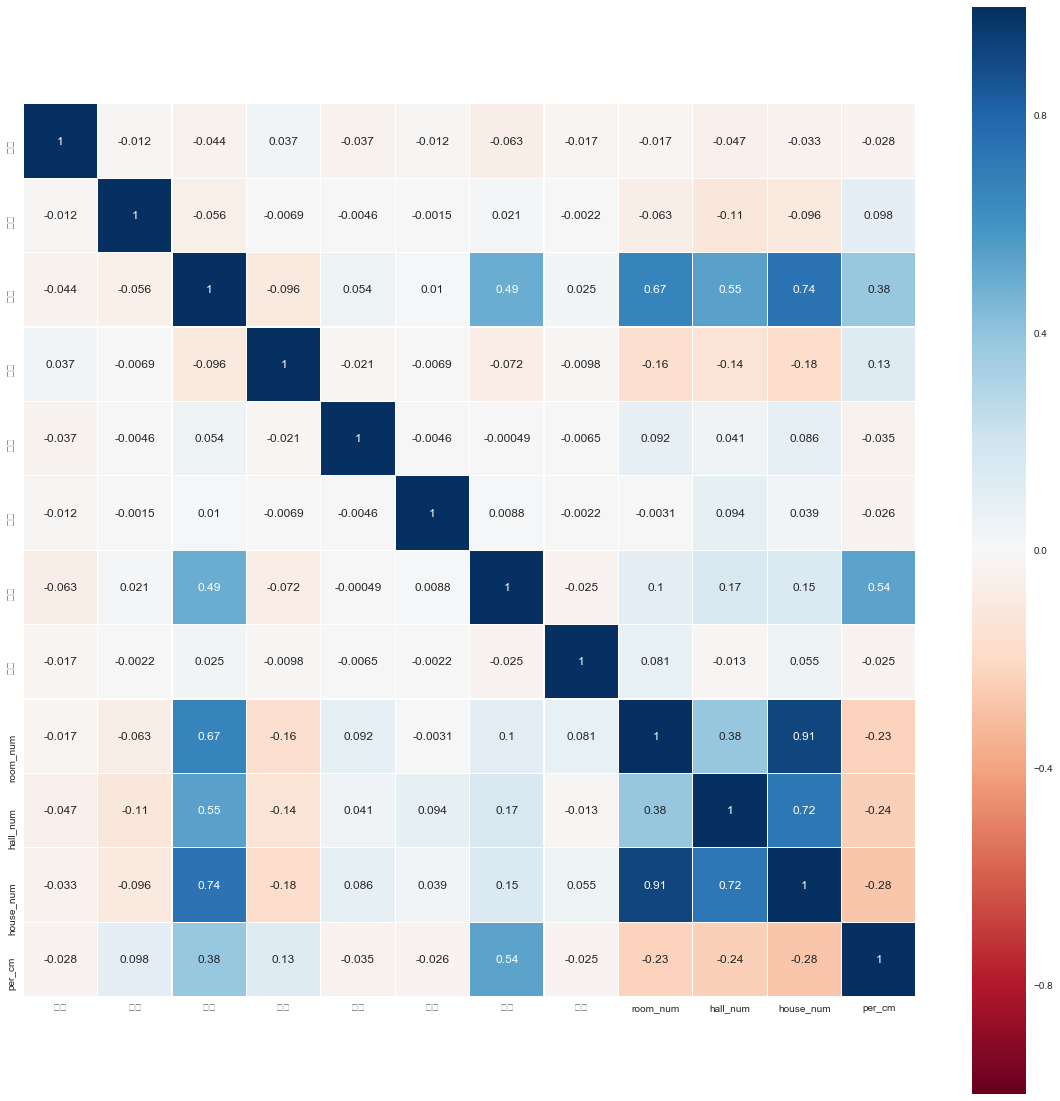

In [150]:
plt.show()

使用Cart决策树的回归模型对二手房房价进行分析预测
使用交叉验证方法充分利用数据集进行训练，避免数据划分不均匀的影响。
使用GridSearchCV方法优化模型参数
使用R2评分方法对模型预测评分

In [151]:
price=pd.DataFrame()
price['总价']=df['总价']
df.drop(['总价'],axis=1,inplace=True)
features = np.array(df)

In [152]:
price=np.array(price)

In [153]:
from sklearn.model_selection import train_test_split
features_train, features_test, prices_train, prices_test = train_test_split(features, price, test_size=0.2, random_state=0)

In [154]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
 
# 利用GridSearchCV计算最优解
def fit_model(X, y):
    """ 基于输入数据 [X,y]，利于网格搜索找到最优的决策树模型"""
 
    cross_validator = KFold(10, shuffle=True)
    regressor = DecisionTreeRegressor()

    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cross_validator)

    # 基于输入数据 [X,y]，进行网格搜索
    grid = grid.fit(X, y)
#     print pd.DataFrame(grid.cv_results_)
    return grid.best_estimator_

# 计算R2分数
def performance_metric(y_true, y_predict):
    """计算并返回预测值相比于预测值的分数"""
    from sklearn.metrics import r2_score
    score = r2_score(y_true, y_predict)

    return score

In [156]:
optimal_reg1 = fit_model(features_train, prices_train)

In [157]:
print("最理想模型的参数 'max_depth' 是 {} 。".format(optimal_reg1.get_params()['max_depth']))

最理想模型的参数 'max_depth' 是 4 。


In [158]:
predicted_value = optimal_reg1.predict(features_test)
r2 = performance_metric(prices_test, predicted_value)
print("最优模型在测试数据上 R^2 分数 {:,.2f}。".format(r2))

最优模型在测试数据上 R^2 分数 0.33。


In [167]:
data=prices_test
data=pd.DataFrame(data)
data=pd.DataFrame(dat  a.values,columns=['real'])
pre=pd.DataFrame(predicted_value)
data['pre']=pre
data.head()

,real,pre
0,448,518.900000
1,800,545.028037
2,838,735.333333
3,455,545.028037
4,585,545.028037


In [172]:
data=pd.DataFrame(data)
data=pd.DataFrame(data.values,columns=['real','pre'])

,real,pre
0,448,518.9
1,800,545.028
2,838,735.333
3,455,545.028
4,585,545.028
5,446,386.087
6,570,386.087
7,245,545.028
8,345,545.028
9,229,386.087


In [173]:
f,ax1=plt.subplots(figsize=(15,10))
x=1
ax1.plot(x,,'r',)

TypeError: No loop matching the specified signature and casting
was found for ufunc svd_n_s